In [ ]:
from impresso import connect, AND, OR

impresso = connect()

# Text reuse clusters

## Find clusters mentioning text

In [12]:
impresso.text_reuse.clusters.find(
    term="chirimoya",
    offset=2,
    limit=5,
    order_by="passages-count",
)

,lexicalOverlap,clusterSize,textSample,timeCoverage.startDate,timeCoverage.endDate
uid,,,,,
tr-all-v1-24-c25769902214,61.176471,2,une longueur du\ndeuxième au troisième.\nPRIX ...,1899-08-13,1899-08-13
tr-all-v1-24-c14741,20.792079,2,"1"", 03 fr. 50 et 25 fr. 50 placé ; 2"", 45 fr. ...",1900-05-28,1900-05-29
tr-all-v1-24-c60129751715,20.000000,2,"43 fr. 50 placé; 2 e, 30 fr. 00;\n3 e, 51 fr. ...",1899-10-17,1899-10-18


### Pagination

In [20]:
result = impresso.text_reuse.clusters.find(
    term="chirimoya",
    limit=5,
    order_by="passages-count",
)

print(f"Total items in the result set: {result.total}. Limit: {result.limit}. Offset: {result.offset}. Size: {result.size}.")
for page in result.pages():
    print(
        f"Got page {page.offset} - {page.offset + page.size} of {page.total}. "
        + f"The first sample is {page.pydantic.data[0].textSample[:30]}..."
    )

Total items in the result set: 28. Limit: 5. Offset: 0. Size: 5.
Got page 0 - 5 of 28. The first sample is PRIX DE MARIGNY. 3 ans et au-d...
Got page 5 - 10 of 28. The first sample is Ipeck (J. Watkins), 3* Pouilli...
Got page 10 - 15 of 28. The first sample is PRIX DE MARIGNY. 3 ans et au-d...
Got page 15 - 20 of 28. The first sample is PRIX DU GOUVERNEMENT. 2,000 fr...
Got page 20 - 25 of 28. The first sample is Prix, Vermeille, 40,000 francs...
Got page 25 - 28 of 28. The first sample is Prix de Ghcffrevillo (8,000 fr...


## Cluster size

In [21]:
impresso.text_reuse.clusters.find(
    term="banana",
    cluster_size=(50, 100),
)

,lexicalOverlap,clusterSize,textSample,timeCoverage.startDate,timeCoverage.endDate
uid,,,,,
tr-all-v1-24-c8590012740,38.571429,50,"La Chaux-de-Fonds,\nLe Sphynx samedi 22 mars 2...",2008-01-14,2008-12-22
tr-all-v1-24-c8590012740,38.571429,50,"La Chaux-de-Fonds,\nLe Sphynx samedi 22 mars 2...",2008-01-14,2008-12-22
tr-all-v1-24-c452205,1.000000,95,Amérique (lu Nom : pour.New-York via Cher-\nbo...,1921-11-04,1924-09-10


## Mentioning text in title

In [22]:
impresso.text_reuse.clusters.find(
    title=AND("luxembourg", "suisse"),
    cluster_size=(100, 200),
)

,lexicalOverlap,clusterSize,textSample,timeCoverage.startDate,timeCoverage.endDate
uid,,,,,
tr-all-v1-24-c73349,0.60241,127,Tarif international voyageurs et\nbagages Luxe...,1931-02-16,1957-11-01
tr-all-v1-24-c73349,0.60241,127,Trafic-marchandises Luxembourg — Suisse.\nAvec...,1931-02-16,1957-11-01
tr-all-v1-24-c73349,0.60241,127,AVIS — Tarif international voyageurs\net bagag...,1931-02-16,1957-11-01


## Lexical overlap

In [23]:
impresso.text_reuse.clusters.find(
    term="banana",
    lexical_overlap=(50, 51),
)

,lexicalOverlap,clusterSize,textSample,timeCoverage.startDate,timeCoverage.endDate
uid,,,,,
tr-all-v1-24-c17180643325,50.37037,7,"Lo Temps a reçu do Banana, embouchure du\nCong...",1889-01-17,1889-01-18
tr-all-v1-24-c17180643325,50.37037,7,"Stanley\nte temps vient de recevoir de Banana,...",1889-01-17,1889-01-18
tr-all-v1-24-c17180643325,50.37037,7,"Nouvelle » < J « Slaniey.\nNous venons, dit le...",1889-01-17,1889-01-18


## Day delta

Number of days between the first and last mention of the text in the cluster.

In [25]:
impresso.text_reuse.clusters.find(
    term="banana",
    day_delta=(50, 100),
)

,lexicalOverlap,clusterSize,textSample,timeCoverage.startDate,timeCoverage.endDate
uid,,,,,
tr-all-v1-24-c77310151136,22.222222,4,8 p\n13. Croix Madame 55 T. Huet F. Doumen 10 ...,2012-02-15,2012-05-12
tr-all-v1-24-c137439334025,78.536585,2,Les Sociétés anonymes suisses\npendant la cris...,1937-05-08,1937-07-10


## Date range

In [26]:
from impresso import DateRange

impresso.text_reuse.clusters.find(
    term="banana", 
    date_range=DateRange("1921-05-21", "2001-01-02")
)

,lexicalOverlap,clusterSize,textSample,timeCoverage.startDate,timeCoverage.endDate
uid,,,,,
tr-all-v1-24-c34359854842,84.000000,2,¦ ~\nBANANISSIM 0!\nWir servieren\nkulinarisch...,1973-05-16,1973-05-18
tr-all-v1-24-c34359854842,84.000000,2,m\nBANANISSIM 0 I\nWir servieren\nkulinarische...,1973-05-16,1973-05-18
tr-all-v1-24-c515122,66.956522,2,veut récupérer\nMatadi et Banana\nLéopoldville...,1961-03-07,1961-03-07


## Newspaper

In [27]:
impresso.text_reuse.clusters.find(
    term="banana", 
    newspaper_id=OR("EXP", "GDL"),
)

,lexicalOverlap,clusterSize,textSample,timeCoverage.startDate,timeCoverage.endDate
uid,,,,,
tr-all-v1-24-c111669250947,100.000,2,"Banana, Feindouno et\nFeltscher à Lausanne\nFO...",2013-08-31,2013-08-31
tr-all-v1-24-c137438967408,100.000,2,Deschansonsàenfairetrémousserplusd’un\nFocus\n...,2008-07-10,2008-07-10
tr-all-v1-24-c85899565930,34.375,2,"Colonies de vacances », « Juanita\nBanana », «...",1967-06-22,1967-10-02


## Collection

In [28]:
impresso.text_reuse.clusters.find(collection_id="12312312")

""


## Front page

In [29]:
impresso.text_reuse.clusters.find(
    term="banana", 
    front_page=True,
)

,lexicalOverlap,clusterSize,textSample,timeCoverage.startDate,timeCoverage.endDate
uid,,,,,
tr-all-v1-24-c60130139951,60.606061,2,"La « Panther » coulée\nMilan, 28 teptembre.\nD...",1914-09-29,1914-09-29
tr-all-v1-24-c94489993744,67.441860,2,Les dernières nouvelles de l'expédition\nStanl...,1887-04-29,1887-04-29
tr-all-v1-24-c25769855244,53.658537,3,congolaise\nLEOPOLDVILLE (AFP et VPI). — « D'a...,1961-03-21,1961-03-21


## Topic

In [30]:
impresso.text_reuse.clusters.find(
    term="banana", 
    topic_id=OR("tm-fr-all-v2.0_tp07_fr", "tm-fr-all-v2.0_tp48_fr")
)

,lexicalOverlap,clusterSize,textSample,timeCoverage.startDate,timeCoverage.endDate
uid,,,,,
tr-all-v1-24-c128849802984,55.172414,3,"Hambourg, 15. — L'enquête ordonnée à\nla suite...",1904-09-16,1904-09-17
tr-all-v1-24-c120259208814,55.172414,3,Samedi et dimanche. l'Aca-\ndémie chorégraphiq...,1927-08-31,1927-09-02
tr-all-v1-24-c85899511538,60.714286,2,Une dépêche de Roma (Congo) annonce\nque le st...,1901-11-05,1901-11-06


## Language

In [31]:
impresso.text_reuse.clusters.find(
    term="luxembourg", 
    language=OR("it", "en")
)

,lexicalOverlap,clusterSize,timeCoverage.startDate,timeCoverage.endDate,textSample
uid,,,,,
tr-all-v1-24-c68719515693,41.176471,2,1939-08-23,1939-08-26,NaN
tr-all-v1-24-c8590220034,51.282051,2,1987-09-25,1987-09-25,NaN
tr-all-v1-24-c606366,36.363636,4,1986-10-02,1988-09-23,NaN


## Country

In [32]:
impresso.text_reuse.clusters.find(
    term="schengen", 
    country=OR("FR", "CH")
)

,lexicalOverlap,clusterSize,textSample,timeCoverage.startDate,timeCoverage.endDate
uid,,,,,
tr-all-v1-24-c171798816707,97.297297,2,En route vers\nSchengen\nSUISSE _.\nEn dépit d...,2001-03-27,2001-03-27
tr-all-v1-24-c17180030095,32.000000,6,Schengen augmente l'efficacité de la police.\n...,2005-04-01,2005-04-02
tr-all-v1-24-c171798816707,97.297297,2,En route vers\nSchengen\nSUISSE\nEn dépit des ...,2001-03-27,2001-03-27


## Entity mention

In [33]:
impresso.text_reuse.clusters.find(
    term="schengen", 
    mention=OR("Belval", "Lausanne")
)

,lexicalOverlap,clusterSize,textSample,timeCoverage.startDate,timeCoverage.endDate
uid,,,,,
tr-all-v1-24-c68719924299,90.0,3,Des représen-\ntants du groupe de Schengen et ...,1993-01-23,1993-01-23
tr-all-v1-24-c163209269715,100.0,2,Europe : collaborations indivisibles\npar Jacq...,1993-05-14,1993-05-14
tr-all-v1-24-c8590228981,100.0,2,Faute de\npouvoir adhérer aux Accords de\nSche...,1995-06-28,1995-06-28


## Entity by ID

In [34]:
impresso.text_reuse.clusters.find(
    term="banana",
    entity_id="aida-0001-54-Switzerland"
)

""


# Text reuse clusters facets

## Date range

,count
value,
1738-01-01T00:00:00Z,0
1739-01-01T00:00:00Z,0
1740-01-01T00:00:00Z,0

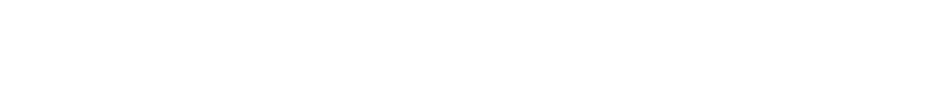

In [35]:
impresso.text_reuse.clusters.facet("daterange", lexical_overlap=(1, 2))

### Pagination

In [36]:
result = impresso.text_reuse.clusters.facet("daterange", lexical_overlap=(1, 2), limit=50)

print(f"Total items in the result set: {result.total}. Limit: {result.limit}. Offset: {result.offset}. Size: {result.size}.")
for page in result.pages():
    print(
        f"Got page {page.offset} - {page.offset + page.size} of {page.total}. "
        + f"The first title is {page.raw['data'][0]['value']}"
    )

Total items in the result set: 281. Limit: 50. Offset: 0. Size: 50.
Got page 0 - 50 of 281. The first title is 1738-01-01T00:00:00Z
Got page 50 - 100 of 281. The first title is 1788-01-01T00:00:00Z
Got page 100 - 150 of 281. The first title is 1838-01-01T00:00:00Z
Got page 150 - 200 of 281. The first title is 1888-01-01T00:00:00Z
Got page 200 - 250 of 281. The first title is 1938-01-01T00:00:00Z
Got page 250 - 281 of 281. The first title is 1988-01-01T00:00:00Z


## Cluster size

,count
value,
1,2647
4223,0
8445,0

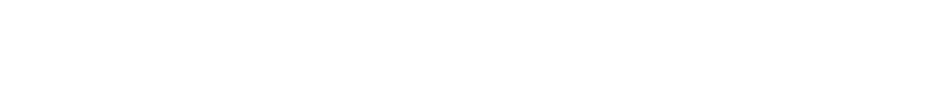

In [37]:
impresso.text_reuse.clusters.facet(
    "textReuseClusterSize",
    lexical_overlap=(1, 2)
)

## Lexical overlap

,count
value,
0,2647
10,0
20,0

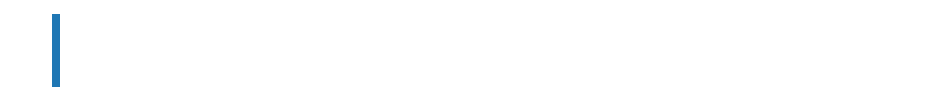

In [38]:
impresso.text_reuse.clusters.facet(
    "textReuseClusterLexicalOverlap",
    lexical_overlap=(1, 2)
)

## Day delta

,count
value,
0,2176
9470,284
18940,87

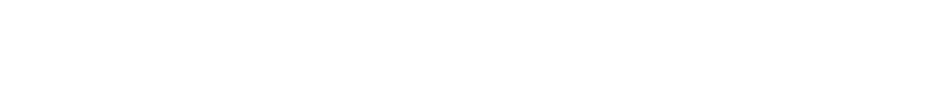

In [39]:
impresso.text_reuse.clusters.facet(
    "textReuseClusterDayDelta",
    lexical_overlap=(1, 2)
)

## Newspaper

,count,label
value,,
AV,1,Indicateur de Lausanne
BNN,10,Bündner Nachrichten
CDV,12,Courrier du Valais

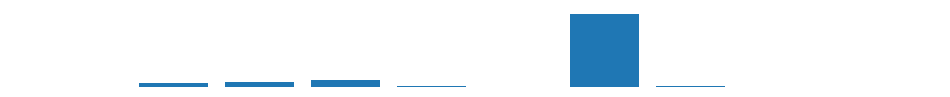

In [40]:
impresso.text_reuse.clusters.facet(
    "newspaper",
    lexical_overlap=(1, 2)
)

# Text reuse passages

## Find passages mentioning text

In [41]:
impresso.text_reuse.passages.find(
    term="belval",
    offset=2,
    limit=5,
    order_by="clusterSize",
)

,content,contentItemId,offset.start,offset.end
uid,,,,
c103079271183-tageblatt-1945-02-05-a-i0028@0:1110,[REDACTED],tageblatt-1945-02-05-a-i0028,0,1110
c103079273629-luxwort-1931-07-17-a-i0053@0:887,[REDACTED],luxwort-1931-07-17-a-i0053,0,887
c103079273629-tageblatt-1931-07-17-a-i0117@0:1031,[REDACTED],tageblatt-1931-07-17-a-i0117,0,1031


### Pagination

In [48]:
result = impresso.text_reuse.passages.find(
    term="luxembourg université",
    offset=1,
    limit=20,
    order_by="clusterSize",
)

print(f"Total items in the result set: {result.total}. Limit: {result.limit}. Offset: {result.offset}. Size: {result.size}.")
for page in result.pages():
    print(
        f"Got page {page.offset} - {page.offset + page.size} of {page.total}. "
        + f"The first title is {page.raw['data'][0]['uid']}"
    )

Total items in the result set: 2. Limit: 20. Offset: 1. Size: 1.
Got page 1 - 2 of 2. The first title is c77309776797-IMP-2007-10-26-a-i0232@0:3325


### Find passages for a cluster by its ID

In [49]:
impresso.text_reuse.passages.find(
    cluster_id="tr-nobp-all-v01-c137438978332",
    order_by="clusterSize",
)

""


## Cluster size

In [50]:
impresso.text_reuse.passages.find(
    term="banana",
    cluster_size=(50, 100),
)

,content,contentItemId,offset.start,offset.end
uid,,,,
c8590012740-EXP-2008-03-25-a-i0105@0:642,[REDACTED],EXP-2008-03-25-a-i0105,0,642
c8590012740-IMP-2008-03-25-a-i0111@0:643,[REDACTED],IMP-2008-03-25-a-i0111,0,643
c452205-lepetitparisien-1922-08-15-a-i0071@11:836,Amérique (lu Nom : pour.New-York via Cher-\nbo...,lepetitparisien-1922-08-15-a-i0071,11,836


## Mentioning text in title

In [51]:
impresso.text_reuse.passages.find(
    title=AND("luxembourg", "suisse"),
    cluster_size=(100, 200),
)

,content,contentItemId,offset.start,offset.end
uid,,,,
c73349-dunioun-1946-02-28-a-i0044@0:477,[REDACTED],dunioun-1946-02-28-a-i0044,0,477
c73349-obermosel-1947-07-03-a-i0018@0:368,[REDACTED],obermosel-1947-07-03-a-i0018,0,368
c73349-luxwort-1946-02-28-a-i0031@0:495,[REDACTED],luxwort-1946-02-28-a-i0031,0,495


## Lexical overlap

In [52]:
impresso.text_reuse.passages.find(
    term="banana",
    lexical_overlap=(50, 51),
)

,content,contentItemId,offset.start,offset.end
uid,,,,
c17180643325-lematin-1889-01-17-a-i0007@102:1068,"Lo Temps a reçu do Banana, embouchure du\nCong...",lematin-1889-01-17-a-i0007,102,1068
c17180643325-lepetitparisien-1889-01-18-a-i0004@0:954,"Stanley\nte temps vient de recevoir de Banana,...",lepetitparisien-1889-01-18-a-i0004,0,954
c17180643325-JDG-1889-01-18-a-i0041@8:1058,[REDACTED],JDG-1889-01-18-a-i0041,8,1058


## Day delta

Number of days between the first and last mention of the text in the cluster.

In [53]:
impresso.text_reuse.passages.find(
    term="banana",
    day_delta=(50, 100),
)

,content,contentItemId,offset.start,offset.end
uid,,,,
c77310151136-IMP-2012-03-13-a-i0196@862:1613,[REDACTED],IMP-2012-03-13-a-i0196,862,1613
c137439334025-LLS-1937-05-08-a-i0020@0:2709,[REDACTED],LLS-1937-05-08-a-i0020,0,2709


## Date range

In [54]:
from impresso import DateRange

impresso.text_reuse.passages.find(
    term="banana", 
    date_range=DateRange("1921-05-21", "2001-01-02")
)

,content,contentItemId,offset.start,offset.end
uid,,,,
c34359854842-DTT-1973-05-16-a-i0233@376:583,[REDACTED],DTT-1973-05-16-a-i0233,376,583
c34359854842-FZG-1973-05-18-a-i0139@12:217,[REDACTED],FZG-1973-05-18-a-i0139,12,217
c515122-JDG-1961-03-07-a-i0101@3226:4339,[REDACTED],JDG-1961-03-07-a-i0101,3226,4339


## Newspaper

In [55]:
impresso.text_reuse.passages.find(
    term="banana", 
    newspaper_id=OR("EXP", "GDL"),
)

,content,contentItemId,offset.start,offset.end
uid,,,,
c111669250947-EXP-2013-08-31-a-i0228@0:634,[REDACTED],EXP-2013-08-31-a-i0228,0,634
c137438967408-EXP-2008-07-10-a-i0330@0:815,[REDACTED],EXP-2008-07-10-a-i0330,0,815
c85899565930-EXP-1967-06-22-a-i0052@1833:1934,[REDACTED],EXP-1967-06-22-a-i0052,1833,1934


## Collection

In [56]:
impresso.text_reuse.passages.find(collection_id="12312312")

""


## Front page

In [57]:
impresso.text_reuse.passages.find(
    term="banana", 
    front_page=True,
)

,content,contentItemId,offset.start,offset.end
uid,,,,
c60130139951-LLE-1914-09-29-a-i0001@14738:14971,[REDACTED],LLE-1914-09-29-a-i0001,14738,14971
c94489993744-GDL-1887-04-29-a-i0003@4424:4759,[REDACTED],GDL-1887-04-29-a-i0003,4424,4759
c25769855244-EXP-1961-03-21-a-i0004@138:1259,[REDACTED],EXP-1961-03-21-a-i0004,138,1259


## Topic

In [58]:
impresso.text_reuse.passages.find(
    term="banana", 
    topic_id=OR("tm-fr-all-v2.0_tp07_fr", "tm-fr-all-v2.0_tp48_fr")
)

,content,contentItemId,offset.start,offset.end
uid,,,,
c128849802984-EXP-1904-09-16-a-i0064@285:483,[REDACTED],EXP-1904-09-16-a-i0064,285,483
c120259208814-IMP-1927-08-31-a-i0057@9108:9556,[REDACTED],IMP-1927-08-31-a-i0057,9108,9556
c85899511538-indeplux-1901-11-06-a-i0013@387:815,[REDACTED],indeplux-1901-11-06-a-i0013,387,815


## Language

In [59]:
impresso.text_reuse.passages.find(
    term="luxembourg", 
    language=OR("it", "en")
)

,content,contentItemId,offset.start,offset.end
uid,,,,
c68719515693-luxembourg1935-1939-08-23-a-i0005@0:595,[REDACTED],luxembourg1935-1939-08-23-a-i0005,0,595
c8590220034-GDL-1987-09-25-a-i0302@293:837,[REDACTED],GDL-1987-09-25-a-i0302,293,837
c606366-GDL-1987-09-25-a-i0302@69:816,[REDACTED],GDL-1987-09-25-a-i0302,69,816


## Country

In [60]:
impresso.text_reuse.passages.find(
    term="schengen", 
    country=OR("FR", "CH")
)

,content,contentItemId,offset.start,offset.end
uid,,,,
c171798816707-IMP-2001-03-27-a-i0004@0:274,[REDACTED],IMP-2001-03-27-a-i0004,0,274
c17180030095-EXP-2005-04-02-a-i0127@64:312,[REDACTED],EXP-2005-04-02-a-i0127,64,312
c171798816707-EXP-2001-03-27-a-i0006@0:270,[REDACTED],EXP-2001-03-27-a-i0006,0,270


## Entity mention

In [61]:
impresso.text_reuse.passages.find(
    term="schengen", 
    mention=OR("Belval", "Lausanne")
)

,content,contentItemId,offset.start,offset.end
uid,,,,
c68719924299-EXP-1993-01-23-a-i0070@1167:1571,[REDACTED],EXP-1993-01-23-a-i0070,1167,1571
c163209269715-JDG-1993-05-14-a-i0004@0:654,[REDACTED],JDG-1993-05-14-a-i0004,0,654
c8590228981-GDL-1995-06-28-a-i0226@1881:2069,[REDACTED],GDL-1995-06-28-a-i0226,1881,2069


## Entity by ID

In [62]:
impresso.text_reuse.passages.find(
    term="banana",
    entity_id="aida-0001-54-Switzerland"
)

""


# Text reuse passages facets

## newspaper

,count,label
value,,
ACI,1,Almanach pour le commerce
AV,206,Indicateur de Lausanne
BDC,226,Bulletin des séances de la Constituante

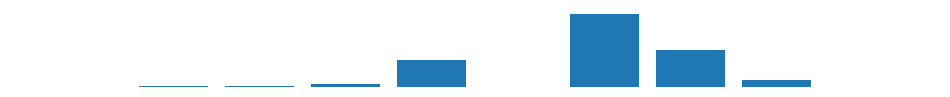

In [63]:
impresso.text_reuse.clusters.facet("newspaper")

### Pagination

In [64]:
result = impresso.text_reuse.clusters.facet("newspaper", limit=50)

print(f"Total items in the result set: {result.total}. Limit: {result.limit}. Offset: {result.offset}. Size: {result.size}.")
for page in result.pages():
    print(
        f"Got page {page.offset} - {page.offset + page.size} of {page.total}. "
        + f"The first title is {page.raw['data'][0]['label']}"
    )

Total items in the result set: 130. Limit: 50. Offset: 0. Size: 50.
Got page 0 - 50 of 130. The first title is Almanach pour le commerce
Got page 50 - 100 of 130. The first title is Le Courrier fribourgeois
Got page 100 - 130 of 130. The first title is Excelsior


## daterange

In [65]:
impresso.text_reuse.passages.facet(
    "daterange",
    term="banana"
)

,count
value,
1733-07-01T00:00:00Z,0
1734-07-01T00:00:00Z,0
1735-07-01T00:00:00Z,0


## year

In [67]:
impresso.text_reuse.passages.facet(
    "year",
    term="banana"
)

""


## connectedClusters

In [68]:
impresso.text_reuse.passages.facet(
    "connectedClusters",
    term="banana"
)

,count
value,
tr-all-v1-24-c103079251103,1
tr-all-v1-24-c103079443428,2
tr-all-v1-24-c103079453365,1


## textReuseClusterSize

In [69]:
impresso.text_reuse.passages.facet(
    "textReuseClusterSize",
    term="banana"
)

,count
value,
2,515
252,1
502,1


## textReuseClusterLexicalOverlap

In [70]:
impresso.text_reuse.passages.facet(
    "textReuseClusterLexicalOverlap",
    term="banana"
)

,count
value,
0,5
1,3
2,0


## textReuseClusterDayDelta

In [71]:
impresso.text_reuse.passages.facet(
    "textReuseClusterDayDelta",
    term="banana"
)

,count
value,
0,440
118,11
236,12


## textReuseCluster

In [72]:
impresso.text_reuse.passages.facet(
    "textReuseCluster",
    term="banana"
)

,count
value,
tr-all-v1-24-c103079570140,1
tr-all-v1-24-c103079589728,2
tr-all-v1-24-c103079624507,2


## collection

In [ ]:
impresso.text_reuse.passages.facet(
    "collection",
    term="banana"
)

""


## topic

In [ ]:
impresso.text_reuse.passages.facet("topic", term="banana")

""


## person

In [ ]:
impresso.text_reuse.passages.facet("person", term="banana")

""


## location

In [ ]:
impresso.text_reuse.passages.facet("location", term="banana")

""


## nag

In [ ]:
impresso.text_reuse.passages.facet("nag", term="banana")

""


## language

In [ ]:
impresso.text_reuse.passages.facet("language", term="banana")

,count
value,
de,6
fr,10


## country

In [ ]:
impresso.text_reuse.passages.facet("country", term="banana")

,count
value,
CH,16
